In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

In [2]:
def load_ces(file):
    df_ces = pd.read_table(file)
    ces = df_ces.sum()[2:]
    return pd.DataFrame(ces,columns=['ces'])

def load_data(file, cat=None):    
    df = pd.read_table(file)
    patients = df['COMMON']
    df = df.transpose()[2:]
    df.columns = [s + '_' +cat for s in patients]
    return df

def load_mutation(file):
    df = pd.read_table(file)[['Sample ID', 'Mutation Count', 'CNA']]
    return df

In [3]:
from pylab import plot, show, savefig, xlim, figure, \
                hold, ylim, legend, boxplot, setp, axes

# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], color='blue')
    setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
#     setp(bp['fliers'][2], color='red')
#     setp(bp['fliers'][3], color='red')
    setp(bp['medians'][1], color='red')

In [4]:
def boxplotcomp(selectedgene=None):
    d = {}
    for g in genes:
        if selectedgene == None:
            d[g] = [list(df[df['msi_status']==0][g+'_expr']),list(df[df['msi_status']==1][g+'_expr'])]
        else:
            li = []
            for ix,row in df.iterrows():
                if selectedgene in row['msi_deficiency']:
                    li.append(True)
                else:
                    li.append(False)

            d[g] = [list(df[li][g+'_expr']),list(df[df['msi_status']==1][g+'_expr'])]
    figlen = 20
    figheigth = 12

    fig = figure(figsize=(figlen, figheigth))
    ax = axes()
    hold(True)

    i = 0
    for g in genes:
        bp = boxplot(d[g], positions=[i+1,i+2],widths=0.6)
        setBoxColors(bp)
        i+=2

    # set axes limits and labels
    plt.xticks(range(0, (len(genes)+1) * 2, 2), [''] + genes)
    if selectedgene == None:
        plt.title('MSS and MSI tumors comparison')

    else:
        plt.title(selectedgene+' deficient ('+str(len(d[selectedgene][0]))+' tumors) and MSI tumors comparison')
    # draw temporary red and blue lines and use them to create a legend
    hR, = plot([1,1],'r-')
    hB, = plot([1,1],'b-')
    if selectedgene == None:
        legend((hR, hB),('MSI tumors','MSS'))
    else:
        legend((hR, hB),('MSI tumors',selectedgene+' deficient tumors'))
    hB.set_visible(False)
    hR.set_visible(False)

    if selectedgene == None:
        savefig('results/MSS and MSI tumors comparison.png')
    else:
        savefig('results/'+selectedgene+' deficient and MSI tumors comparison.png')
    show()

In [5]:
genes = list(pd.read_table('data/prostate/mmr_mutation.txt')['COMMON'])
genes

['MLH1', 'MLH3', 'MSH2', 'MSH3', 'MSH6', 'PCNA', 'PMS2', 'RFC1']

In [6]:
# df1 = load_data('data/stomach/mrr_methylation.txt', cat='meth')
# df1.head()

In [7]:
df2 = load_ces('data/prostate/ces_expr.txt')
df2.head()

,ces
TCGA-V1-A9OQ-01,-2.4242
TCGA-V1-A8MK-01,-6.8332
TCGA-XK-AAJT-01,-4.3832
TCGA-EJ-5502-01,-4.1643
TCGA-YJ-A8SW-01,5.5462


In [8]:
df3 = load_data('data/prostate/mmr_expr.txt', cat='expr')
df3.head()

,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr
TCGA-V1-A9OQ-01,0.1439,-0.1586,-0.7158,-0.2413,-1.2654,-0.7657,0.2599,-0.4647
TCGA-V1-A8MK-01,0.1684,0.6646,-0.9184,-0.9696,-0.6699,-0.7658,-0.8535,-0.3696
TCGA-XK-AAJT-01,-1.4272,0.3901,-1.3734,-1.9476,-0.3506,-0.5896,-0.397,-0.785
TCGA-EJ-5502-01,-0.3286,-0.1384,-0.096,0.0736,0.0553,-0.7634,-0.7136,0.442
TCGA-YJ-A8SW-01,-0.3374,1.2038,-0.367,0.0213,-0.1554,0.1864,-0.237,2.0963


In [9]:
df4 = load_data('data/prostate/mmr_mutation.txt', cat='mut')
df4.head()

,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut
TCGA-V1-A9OQ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-V1-A8MK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-XK-AAJT-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-EJ-5502-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-YJ-A8SW-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df5 = load_mutation('data/prostate/cna_mutation.txt')
df5.head()

,Sample ID,Mutation Count,CNA
0,TCGA-CH-5767-01,44,0.083612
1,TCGA-G9-6332-01,30,0.065655
2,TCGA-G9-6336-01,20,0.000110
3,TCGA-G9-6348-01,45,0.082028
4,TCGA-G9-6356-01,35,0.002082


In [11]:
df = df2.merge(df3, right_index=True, left_index=True, how='outer')
df = df.merge(df4, left_index=True, right_index=True, how='outer')
df = df.merge(df5, left_index=True, right_index=True, how='outer')
# df = df.merge(df4, left_on='Sample ID', right_index=True)
df.head()

,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,Sample ID,Mutation Count,CNA
TCGA-2A-A8VL-01,-8.1267,0.1317,-0.4904,-0.9745,-1.2503,-1.1539,-0.5898,-0.7304,-0.677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VO-01,-5.1121,-0.5324,-0.1786,-0.8702,-0.3605,-1.3979,-0.6563,-0.5128,-0.4589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VT-01,-2.9796,0.5787,1.1407,1.3846,1.0856,0.1158,-0.3714,3.0219,-0.0021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VV-01,-2.5221,-0.8304,0.2894,0.3227,0.0703,-0.8954,-0.6155,0.8496,-0.6687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2A-A8VX-01,11.0921,-0.8645,0.3305,0.5187,0.1103,-0.6489,0.6253,1.6657,-0.7972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


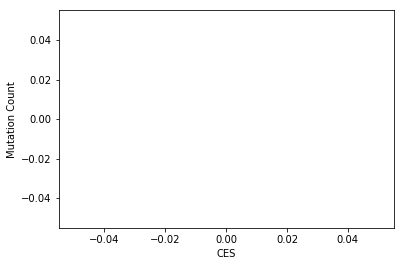

In [12]:
plt.scatter(df['ces'],df['Mutation Count'])
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

# MSI status in function of gene expression

If the tumor is is in the lower 10% for one gene expression, it is labelled as MSI.

In [13]:
df['msi_status'] = np.zeros(len(df))
df['msi_deficiency'] = [list() for x in range(len(df.index))]
for g in genes:
    limit = df[g+'_expr'].quantile(0.05)
    limit2 = df[g+'_expr'].quantile(0.1)
    for ix in df[df[g+'_expr']<limit]['msi_status'].index:
        df = df.set_value(ix,'msi_status',1)
        df = df.set_value(ix,'msi_deficiency',df['msi_deficiency'][ix]+[g])
        
    for ix in df[df[g+'_expr']<limit2]['msi_status'].index:
        try:
            status = float(df[ix:ix+1]['msi_status'])
        except:
            status = -1
        
        if status == 0.:
            df = df.set_value(ix,'msi_status',0.5)
        elif status == 0.5:
            df = df.set_value(ix,'msi_status',0.1)

df.head()

,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,...,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,Sample ID,Mutation Count,CNA,msi_status,msi_deficiency
TCGA-2A-A8VL-01,-8.1267,0.1317,-0.4904,-0.9745,-1.2503,-1.1539,-0.5898,-0.7304,-0.677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]
TCGA-2A-A8VO-01,-5.1121,-0.5324,-0.1786,-0.8702,-0.3605,-1.3979,-0.6563,-0.5128,-0.4589,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]
TCGA-2A-A8VT-01,-2.9796,0.5787,1.1407,1.3846,1.0856,0.1158,-0.3714,3.0219,-0.0021,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]
TCGA-2A-A8VV-01,-2.5221,-0.8304,0.2894,0.3227,0.0703,-0.8954,-0.6155,0.8496,-0.6687,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]
TCGA-2A-A8VX-01,11.0921,-0.8645,0.3305,0.5187,0.1103,-0.6489,0.6253,1.6657,-0.7972,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[]


# MSI status in function of mutation

If one the the gene in the pathway is mutated, the tumor is classified as MSI.

In [14]:
for g in genes:
    no_mutations = pd.isnull(df[g+'_mut'])
    for ix in no_mutations[no_mutations==False].index:
        df = df.set_value(ix,'msi_status',1)

In [15]:
msi = df[df['msi_status']>=0.9]
print(str(len(msi)/float(len(df))*100) + '% of tumors are presumed MSI tumors')
print('Usually 15% of colorectal cancers are MMR deficient.')
print(str(float(np.sum(msi['Mutation Count']>400))/float(len(msi))*100) + '% of presumed MSI tumors have more than 400 mutations')
print(str(float(np.sum(msi['Mutation Count']>400))*100./len(df[df['Mutation Count']>400]))+'% of tumors with more than 400 mutations are presumably MSI.')
print(str(float(np.sum(df['msi_status']==0.99))*100./len(msi))+'% of tumors are MSI because they have 2 underexpressed genes.')

14.2% of tumors are presumed MSI tumors
Usually 15% of colorectal cancers are MMR deficient.
0.0% of presumed MSI tumors have more than 400 mutations
0.0% of tumors with more than 400 mutations are presumably MSI.
0.0% of tumors are MSI because they have 2 underexpressed genes.


# CES, Mutations and MRR status

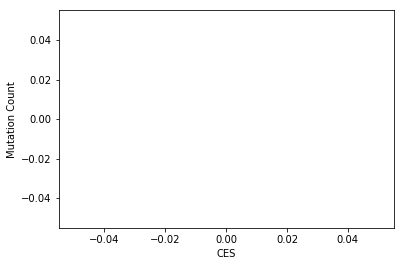

In [16]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

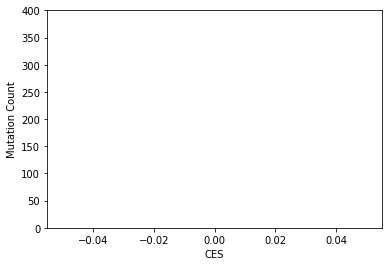

In [17]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylim(0,400)
plt.ylabel('Mutation Count')
plt.show()

In [18]:
print('Spearman Correlation P-value between CES and mutation for:')
print('MSS tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==0]['ces'], df[df['msi_status']==0]['Mutation Count']).pvalue)
print('MSI tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==1]['ces'], df[df['msi_status']==1]['Mutation Count']).pvalue)
print('All tumors')
print(scipy.stats.spearmanr(df['ces'], df['Mutation Count']).pvalue)

Spearman Correlation P-value between CES and mutation for:
MSS tumors


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unorderable types: NoneType() < float()

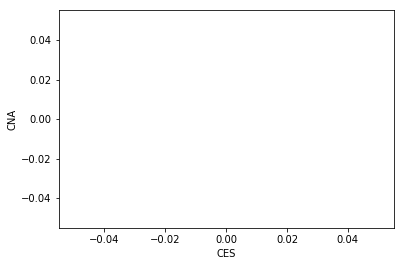

In [19]:
plt.scatter(df['ces'],df['CNA'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('CNA')
plt.show()

/home/ariane/.local/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/u

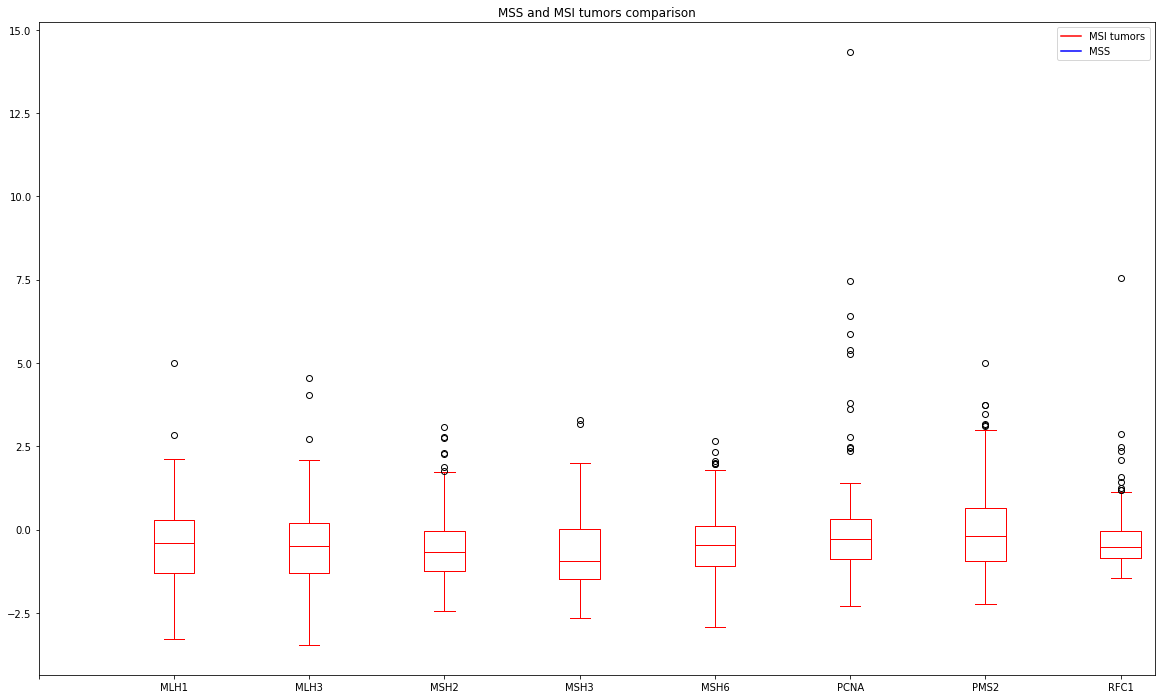

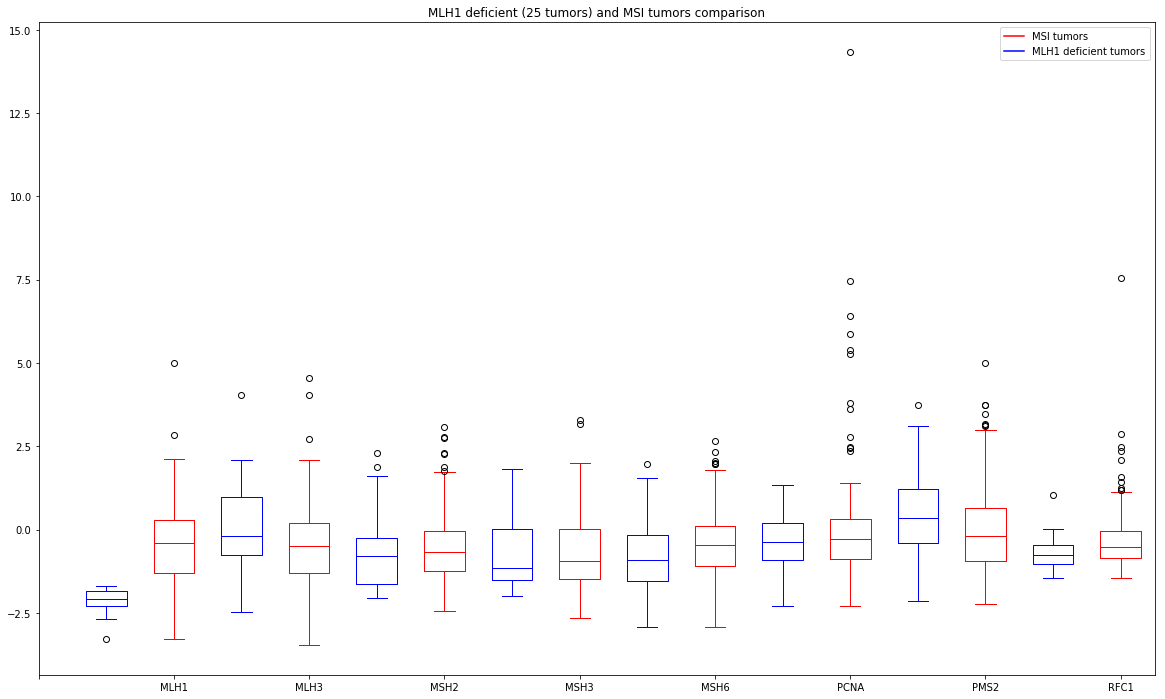

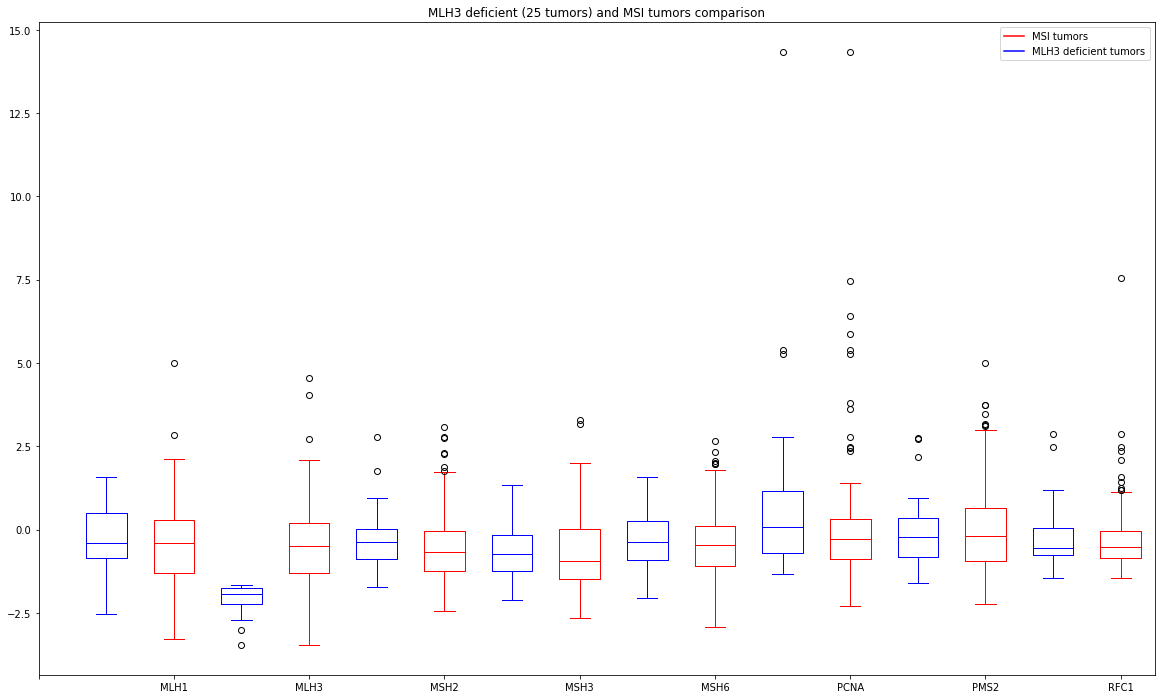

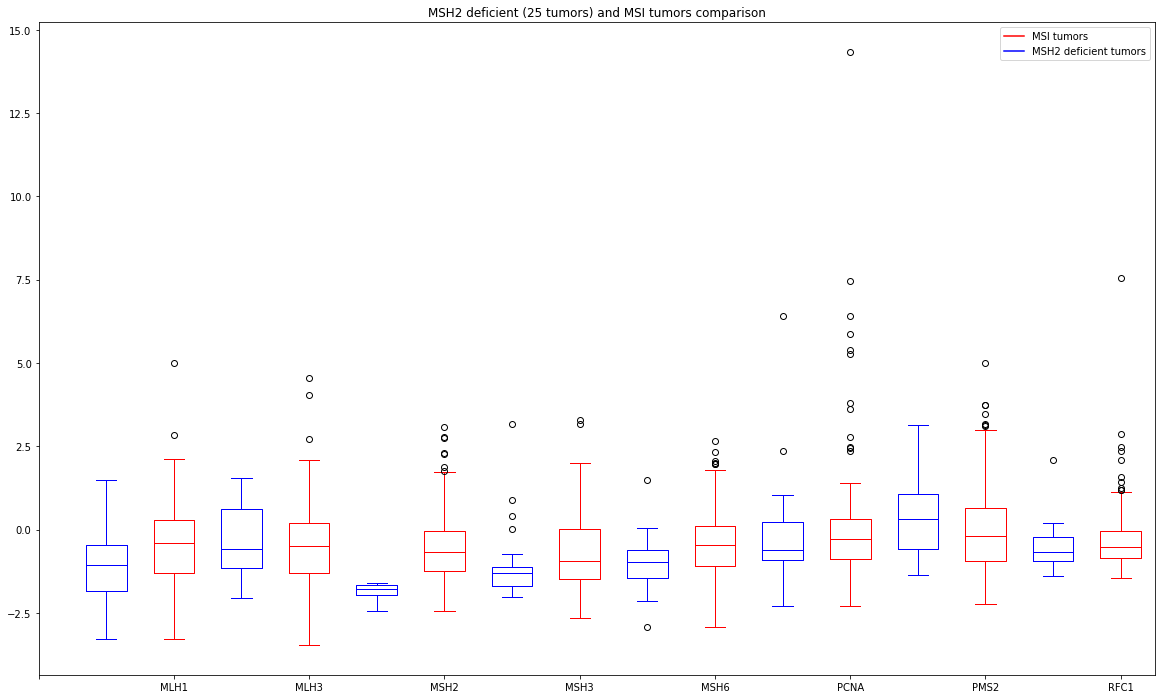

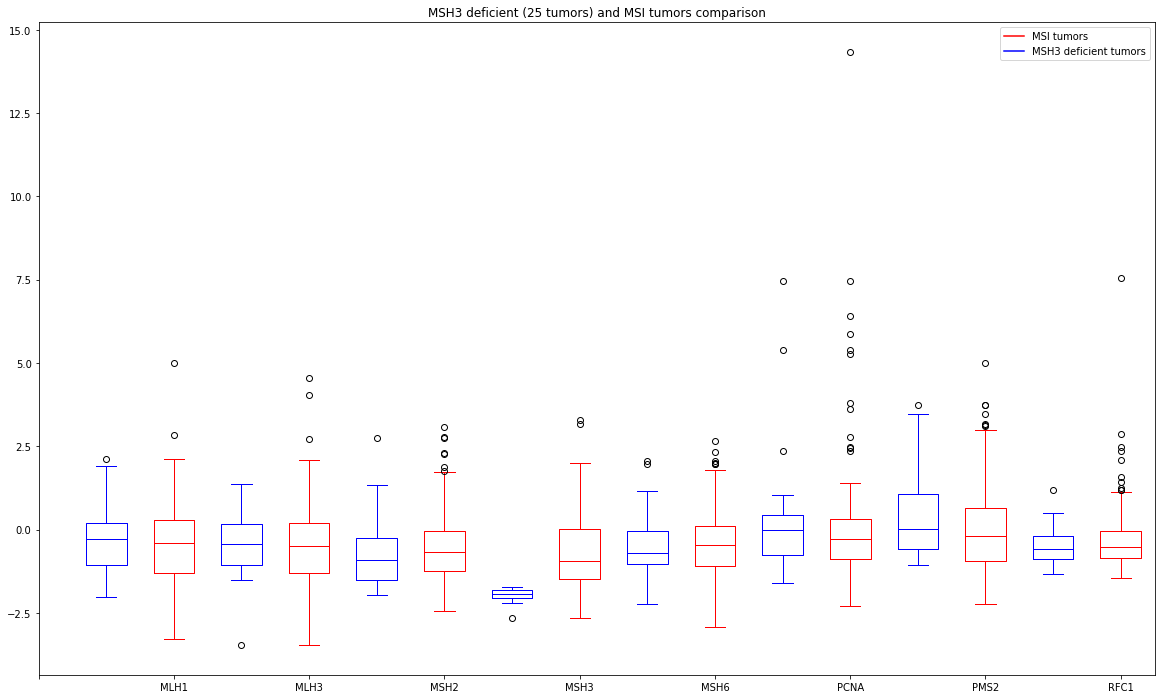

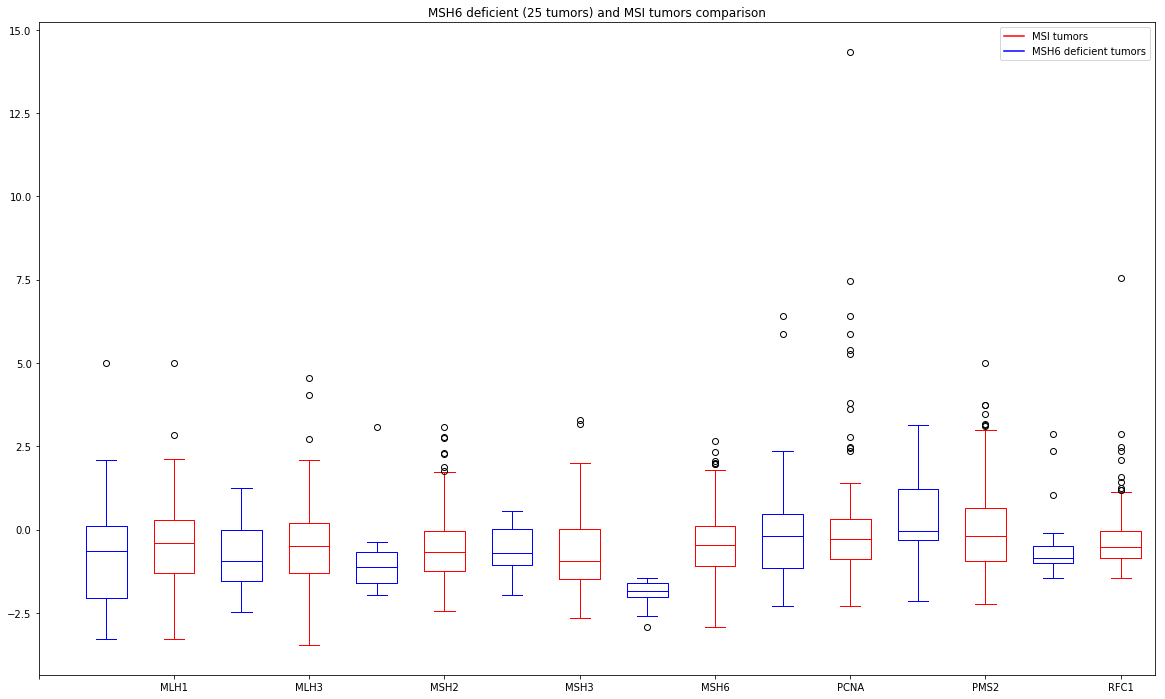

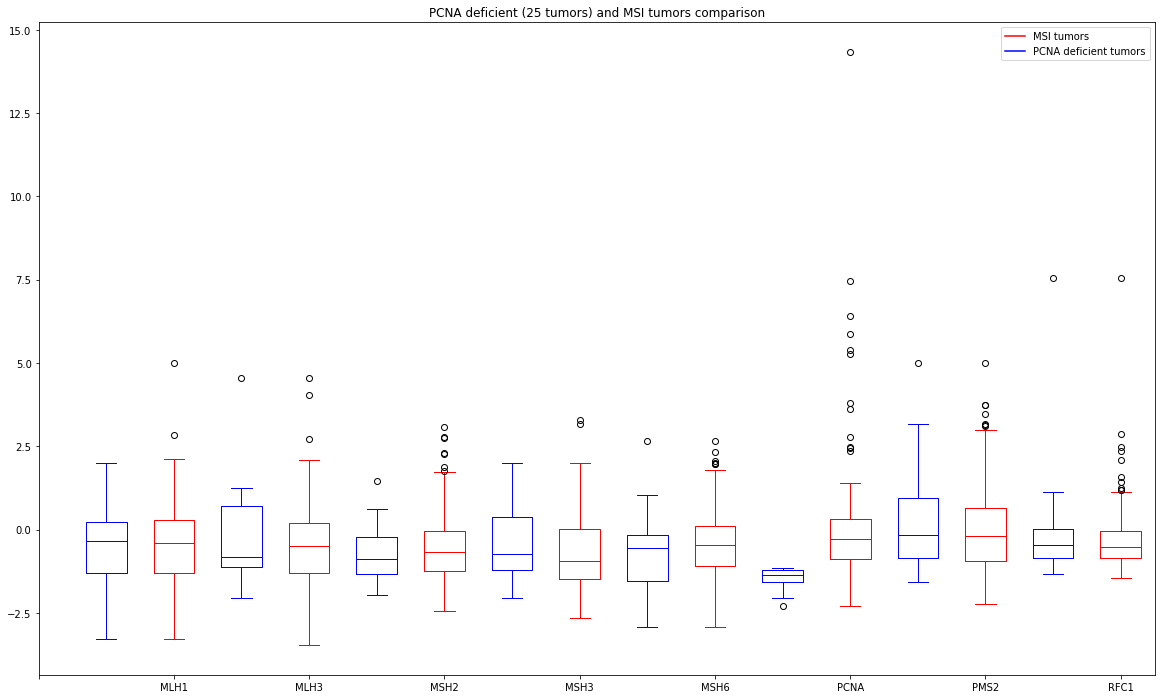

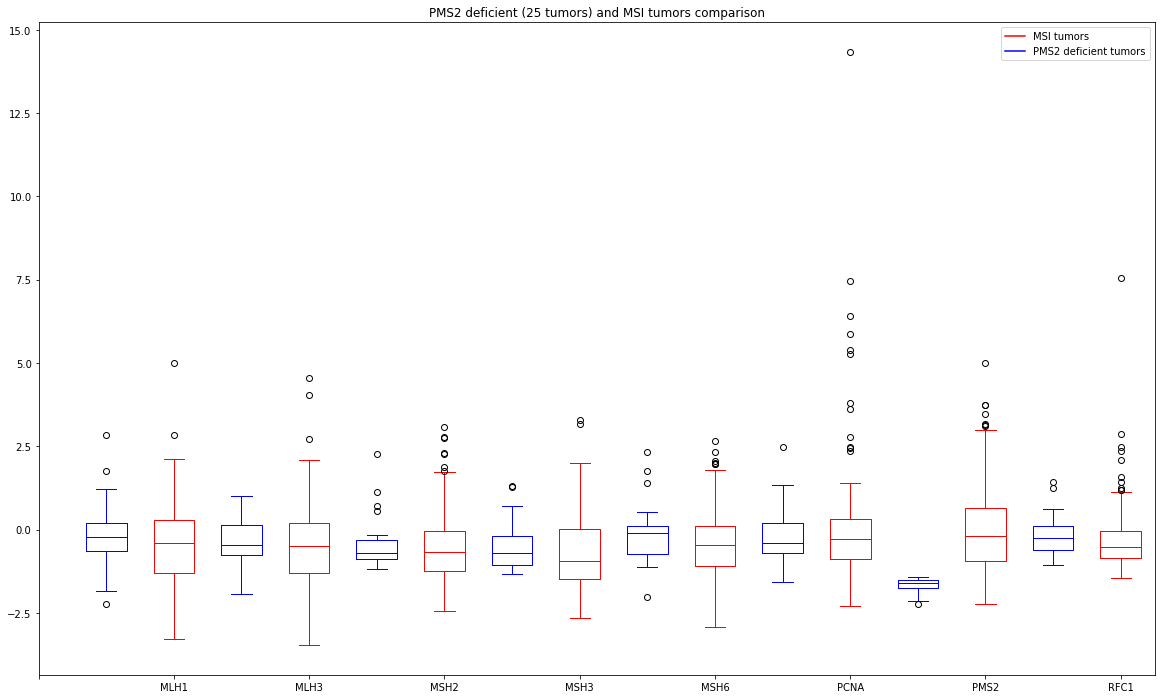

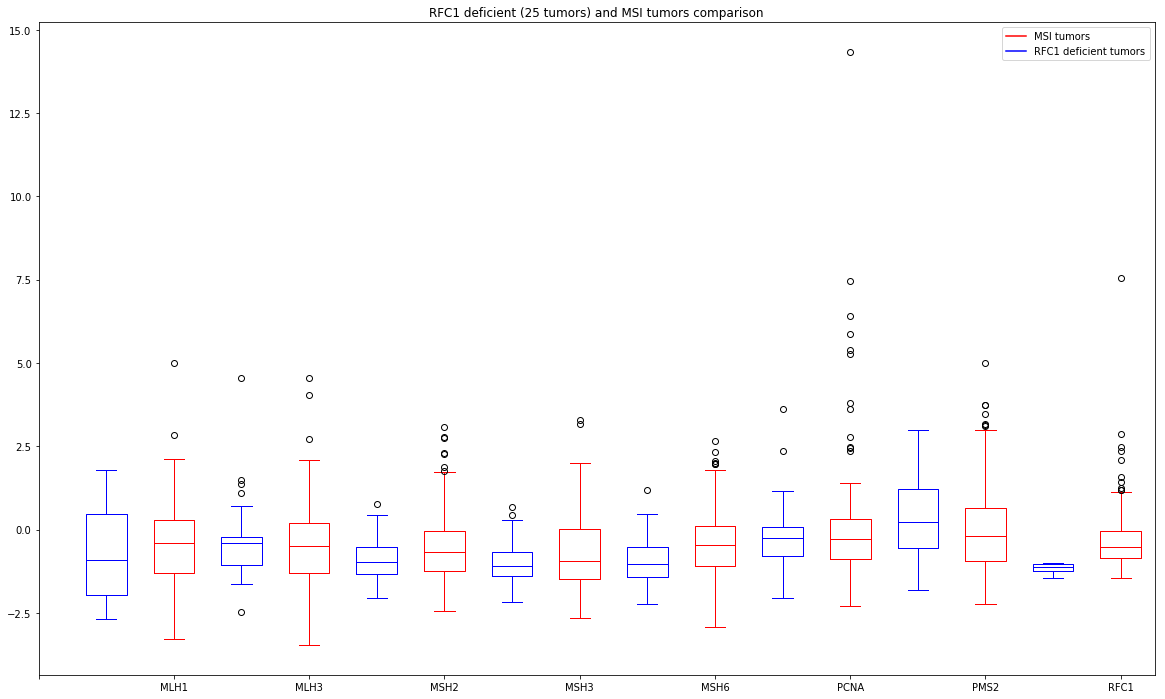

In [20]:
boxplotcomp()
for g in genes:
    boxplotcomp(g)

# Clustering 

In [21]:
for g in genes:
    df[g+'_m']=np.zeros(len(df))
    for ix,row in df.iterrows():
        if type(df.loc[ix,g+'_mut']) is str:
            df.loc[ix,g+'_m'] = 1  
df.head()

,ces,MLH1_expr,MLH3_expr,MSH2_expr,MSH3_expr,MSH6_expr,PCNA_expr,PMS2_expr,RFC1_expr,MLH1_mut,...,msi_status,msi_deficiency,MLH1_m,MLH3_m,MSH2_m,MSH3_m,MSH6_m,PCNA_m,PMS2_m,RFC1_m
TCGA-2A-A8VL-01,-8.1267,0.1317,-0.4904,-0.9745,-1.2503,-1.1539,-0.5898,-0.7304,-0.677,NaN,...,0.0,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-2A-A8VO-01,-5.1121,-0.5324,-0.1786,-0.8702,-0.3605,-1.3979,-0.6563,-0.5128,-0.4589,NaN,...,0.0,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-2A-A8VT-01,-2.9796,0.5787,1.1407,1.3846,1.0856,0.1158,-0.3714,3.0219,-0.0021,NaN,...,0.0,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-2A-A8VV-01,-2.5221,-0.8304,0.2894,0.3227,0.0703,-0.8954,-0.6155,0.8496,-0.6687,NaN,...,0.0,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-2A-A8VX-01,11.0921,-0.8645,0.3305,0.5187,0.1103,-0.6489,0.6253,1.6657,-0.7972,NaN,...,0.0,[],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import sklearn.cluster as cl
li = [s+'_expr' for s in genes] + [s+'_m' for s in genes] + [s+'_meth' for s in genes] + ['msi_status']
dataset = df[li].dropna()
kmeans = cl.KMeans(n_clusters=2, random_state=0).fit(dataset.drop(['msi_status'],axis=1))
dataset['cluster_status'] = kmeans.labels_

KeyError: "['MLH1_meth' 'MLH3_meth' 'MSH2_meth' 'MSH3_meth' 'MSH6_meth' 'PCNA_meth'\n 'PMS2_meth' 'RFC1_meth'] not in index"

In [ ]:
dataset['benchmark'] = np.zeros(len(dataset))
for ix,row in dataset.iterrows():
    if row['msi_status'] == 0:
        if row['cluster_status'] == 0:
            dataset.loc[ix,'benchmark'] = 'TN'
        elif row['cluster_status'] == 1:
            dataset.loc[ix, 'benchmark'] = 'FP'
            
    elif row['msi_status'] == 1:
        if row['cluster_status'] == 0:
            dataset.loc[ix,'benchmark'] = 'FN'
        elif row['cluster_status'] == 1:
            dataset.loc[ix, 'benchmark'] = 'TP'

In [23]:
bench = dataset['benchmark'].value_counts()
print(str(len(dataset)-bench[0]) + ' tumors classified by both algorithm')
print('Recall = '+str(bench['TP']/(bench['TP']+bench['FN'] )))
print('Precision = '+str(bench['TP']/(bench['TP']+bench['FP'] )))

NameError: name 'dataset' is not defined